# Problem Set 5

For this problem set (Due Dec. 6th, 2022), we will be using world.sqlite to answer these questions. The database can be found at the following path on HiPerGator:
```
/blue/bsc4452/share/Class_Files/data/world.sqlite
```

### Group Members
- Amanda Markee
- Julia Bruner
- Kaylin Kleckner

## Question 1 (Amanda)

What is the country with the latest year (most recent) of independence? The code can either be SQL or SQLAlchemy code.

- Provide your answer (2 points) 
- Provide the code used to get that answer (3 points)

In [7]:
#!/usr/bin/env python
from sqlalchemy import create_engine
from sqlalchemy import MetaData
from sqlalchemy import Table, Column
from sqlalchemy import Integer, String
from sqlalchemy import sql, select, join, desc
from sqlalchemy import func

# Create an Engine obect which is our handle into the database
engine = create_engine('sqlite:////blue/bsc4452/amanda.markee/Class_Files/data/world.sqlite')

# Connect to the database
conn = engine.connect()

# Read the metadata from the existing database.
# Since the database already exists, and has tables defined, we can create Python objects based on these automatically.
DBInfo = MetaData(engine)

In [8]:
# Auto-create the city object basedon the metadata read into the DBInfo.
city=Table('city', DBInfo, autoload=True)

In [9]:
type(city) # Not a dataframe, but a SQLalchemy schema table

sqlalchemy.sql.schema.Table

In [10]:
# Mirroring this command: SELECT Id, Name, Population FROM city LIMIT 10;
# city.c.ID where city = object, c = column, and ID = column name
query = select([city.c.ID, city.c.Name, city.c.Population]).limit(10)
result = conn.execute(query)
for row in result:
    print(row)

(1, 'Kabul', 1780000)
(2, 'Qandahar', 237500)
(3, 'Herat', 186800)
(4, 'Mazar-e-Sharif', 127800)
(6, 'Rotterdam', 593321)
(7, 'Haag', 440900)
(8, 'Utrecht', 234323)
(9, 'Eindhoven', 201843)
(10, 'Tilburg', 193238)
(11, 'Groningen', 172701)


In [11]:
# Using the code above for guidence, I want to start building a table for country-specific information
country=Table('country', DBInfo, autoload=True)

In [12]:
# Using the above code for guidence, I want to query the country with their independence year.
# Lastly, I want to print the independence years in descending order to find the youngest country.

query_ind = select([country.c.Name,country.c.IndepYear]).where(country.c.IndepYear is not None).order_by(desc(country.c.IndepYear)).limit(10)

result = conn.execute(query_ind)
for row in result:
    print(row)

('Palau', 1994)
('Czech Republic', 1993)
('Eritrea', 1993)
('Slovakia', 1993)
('Bosnia and Herzegovina', 1992)
('Armenia', 1991)
('Azerbaijan', 1991)
('Belarus', 1991)
('Estonia', 1991)
('Georgia', 1991)


#### The answer for Question 1 is Palau, established in 1994 as the youngest country.

## Question 2 (Julia)

Refer to this page: https://www.statista.com/chart/11430/the-worlds-youngest-countries/Links to an external site. According to this, there are several countries that have become independent since the country in your answer to question 1. Pick one of those newer countries and using Wikipedia, or another source, add as much data to the `country` table as you can for that country. Provide either a SQL INSERT statement or a SQLAlchemy insert statement to add the data for a new country into the database.



In [13]:
# import functions from sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import MetaData
from sqlalchemy import Table, Column
from sqlalchemy import Integer, String
from sqlalchemy import sql, select, join, desc

In [14]:
# Create a engine/handle into the database.
engine = create_engine('sqlite:////blue/bsc4452/juliabruner/world.sqlite')

# Connect to the database
conn = engine.connect()

# Read the metadata from the existing database.
#  Since the database already exists and has tables defined, we can create Python objects based on these automatically.
DBInfo=MetaData(engine)

In [15]:
# Auto-create the tables based on the metadata read into the DBInfo.

city=Table('city', DBInfo, autoload=True)

country=Table('country', DBInfo, autoload=True)

countrylanguage=Table('countrylanguage', DBInfo, autoload=True)

In [16]:
# define values needed to insert country
print(country.insert())

INSERT INTO country ("Code", "Name", "Continent", "Region", "SurfaceArea", "IndepYear", "Population", "LifeExpectancy", "GNP", "GNPOld", "LocalName", "GovernmentForm", "HeadOfState", "Capital", "Code2") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


In [17]:
# providing the information for inserting south sudan as a country
# my_insert=country.insert().values(Code='SSD', Name='South Sudan', Continent='Africa', Region='Central', SurfaceArea=248777, 
#                               IndepYear=2011, Population=11380000, LifeExpectancy=58, GNP=11600000000, GNPOld=0,
#                               LocalName='South Sudan', GovernmentForm='Presidential Republic', HeadOfState='Salva Kiir Mayardit',
#                               Capital='Juba', Code2='')

In [6]:
# execute the insert 
# result = conn.execute(my_insert)

### NOTE: 
The 2 cells above are commented out to prevent an error from displaying. The error is related to the foreign key which dicates that the country code must be unique. Since I already ran the code to insert South as SSD, the cell cannot be run again without giving an error. Instead please refer to the output of the cell below to verify proper country insert. 

In [18]:
# checking that data for South Sudan was sucessfully inserted into the Country Table 
query=select([country.c.Name, country.c.Capital, country.c.IndepYear, country.c.HeadOfState]).where(country.c.Name=='South Sudan')
result = conn.execute(query)
for row in result:
    print(row)

    
# checking that data for South Sudan was sucessfully inserted into the Country Table 

('South Sudan', 'Juba', 2011, 'Salva Kiir Mayardit')


## Question 3 (Julia)

For the country added in question 2, find 2 cities to add to the `cities` table of the database and provide the SQL or SQLAlchemy insert statement to add this data.

In [19]:
# define the values you need to insert 
print(city.insert())

INSERT INTO city ("ID", "Name", "CountryCode", "District", "Population") VALUES (?, ?, ?, ?, ?)


In [20]:
my_insert=city.insert().values(Name='Juba', CountryCode='SSD',District='Central Equatoria',Population=525953)
print(my_insert)

INSERT INTO city ("Name", "CountryCode", "District", "Population") VALUES (?, ?, ?, ?)


In [10]:
#result = conn.execute(my_insert)
    #coded out to avoid error, see note in q2

In [21]:
query=select([city.c.ID, city.c.Name, city.c.District, city.c.Population]).where(city.c.Name.like('Juba'))
result = conn.execute(query)
for row in result:
    print(row)
#checking that Juba was inserted into the city table 

(3235, 'Juba', 'Bahr al-Jabal', 114980)
(1234568, 'Juba', 'Central Equatoria', 525953)
(1234569, 'Juba', 'Central Equatoria', 525953)
(1234571, 'Juba', 'Central Equatoria', 525953)
(1234573, 'Juba', 'Central Equatoria', 525953)


In [22]:
# adding the second city, Malakal
my_insert=city.insert().values(Name='Malakal', CountryCode='SSD',District='Upper Nile State',Population=147450)
print(my_insert)

INSERT INTO city ("Name", "CountryCode", "District", "Population") VALUES (?, ?, ?, ?)


In [25]:
#result = conn.execute(my_insert)
    #coded out to avoid error, see note in q2

In [23]:
query=select([city.c.ID, city.c.Name, city.c.District, city.c.Population]).where(city.c.Name.like('Malakal'))
result = conn.execute(query)
for row in result:
    print(row)
    
# checking that Malakal was inserted into the city table 

(1234570, 'Malakal', 'Upper Nile State', 147450)
(1234572, 'Malakal', 'Upper Nile State', 147450)
(1234574, 'Malakal', 'Upper Nile State', 147450)


## Question 4 (Kaylin)

Using the LifeExpectancy data in the country table on the y-axis, plot this data against some other value.

Suggestions for the x-axis: GNP, Population or IndepYear could be interesting, but up to you.
I'd suggest using `SQLAlchemy`, get the data and make either a dataframe or numpy arrays and then use `matplotlib` to plot.

###



First, load in country table from `world.sqlite` database

In [24]:
#!/usr/bin/env python
from sqlalchemy import create_engine
from sqlalchemy import MetaData
from sqlalchemy import Table, Column
from sqlalchemy import Integer, String
from sqlalchemy import sql, select, join, desc
from sqlalchemy import func

# Create an Engine obect which is our handle into the database
engine = create_engine('sqlite:////blue/bsc4452/kaylin.kleckner/Class_Files/data/world.sqlite')

# Connect to the database
conn = engine.connect()

# Read the metadata from the existing database.
# Since the database already exists, and has tables defined, we can create Python objects based on these automatically.
DBInfo = MetaData(engine)

In [25]:
# Auto-create the city object basedon the metadata read into the DBInfo.
country=Table('country', DBInfo, autoload=True)

In [26]:
type(country) # Check table is loaded

sqlalchemy.sql.schema.Table

### Note:

I opened SQLite in the command line to see table structure. These were the commands used:

`module load sqlite`

`sqlite3 world.sqlite`

`.tables`

`.schema country`


Next, I ran a test query with only 10 rows of the columns I wanted. 

In [27]:
# Mirroring this command: SELECT Id, Name, Population FROM city LIMIT 10;
# city.c.ID where city = object, c = column, and ID = column name
query = select([country.c.Code, country.c.Name, country.c.Continent, country.c.GNP, country.c.LifeExpectancy]).limit(10)
result = conn.execute(query)
for row in result:
    print(row)

('ABW', 'Aruba', 'North America', Decimal('828.0000000000'), Decimal('78.4000000000'))
('AFG', 'Afghanistan', 'Asia', Decimal('5976.0000000000'), Decimal('45.9000000000'))
('AGO', 'Angola', 'Africa', Decimal('6648.0000000000'), Decimal('38.3000000000'))
('AIA', 'Anguilla', 'North America', Decimal('63.2000000000'), Decimal('76.1000000000'))
('ALB', 'Albania', 'Europe', Decimal('3205.0000000000'), Decimal('71.6000000000'))
('AND', 'Andorra', 'Europe', Decimal('1630.0000000000'), Decimal('83.5000000000'))
('ANT', 'Netherlands Antilles', 'North America', Decimal('1941.0000000000'), Decimal('74.7000000000'))
('ARE', 'United Arab Emirates', 'Asia', Decimal('37966.0000000000'), Decimal('74.1000000000'))
('ARG', 'Argentina', 'South America', Decimal('340238.0000000000'), Decimal('75.1000000000'))
('ARM', 'Armenia', 'Asia', Decimal('1813.0000000000'), Decimal('66.4000000000'))


After confirming query structure, I ran a second query with all rows.

In [28]:
query2 = select([country.c.Code, country.c.Name, country.c.Continent, country.c.GNP, country.c.LifeExpectancy])
result2 = conn.execute(query)
#don't print using for loop, too many rows

I converted the query into a dataframe.

In [29]:
import pandas as pd #load pandas module

df=pd.read_sql(query2, conn) #create dataframe from query2 above

df.head() #check dataframe structure 

,Code,Name,Continent,GNP,LifeExpectancy
0,ABW,Aruba,North America,828.0,78.4
1,AFG,Afghanistan,Asia,5976.0,45.9
2,AGO,Angola,Africa,6648.0,38.3
3,AIA,Anguilla,North America,63.2,76.1
4,ALB,Albania,Europe,3205.0,71.6


Lastly, I graphed average life expectancy by continent with the `plotnine` module.

/apps/python/3.10/lib/python3.10/site-packages/plotnine/layer.py:334: PlotnineWarning: stat_boxplot : Removed 17 rows containing non-finite values.
/apps/python/3.10/lib/python3.10/site-packages/plotnine/layer.py:412: PlotnineWarning: geom_jitter : Removed 17 rows containing missing values.


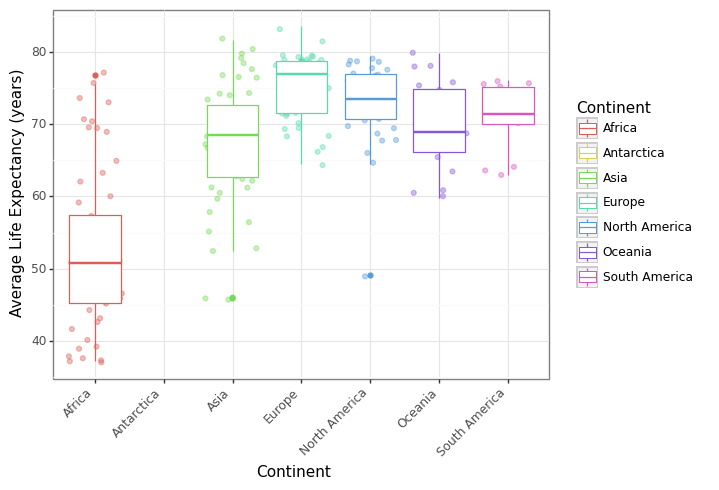

<ggplot: (2949091980427)>

In [53]:
import plotnine as pn #load plotnine module. we love ggplot2 :,)

(
    pn.ggplot(df) #assign dataframe
    + pn.aes(x="Continent", y="LifeExpectancy", color="Continent") #Set axis values and color
    + pn.geom_jitter(alpha = 0.4) #Show raw data points behind boxplots. Adjust transparency with alpha value
    + pn.geom_boxplot() #create boxplots
    + pn.ylab('Average Life Expectancy (years)')
    + pn.theme_bw() #clean up graph with black and white theme
    + pn.theme(axis_text_x=pn.element_text(angle=45, hjust =1)) #clean up graph with black and white theme
)